# 1) Prepare a classification model using SVM for salary data


In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
train_data = pd.read_csv("/content/SalaryData_Train(1).csv")
test_data = pd.read_csv("/content/SalaryData_Test(1).csv")

In [3]:
#Concatenating training and testing data for preprocessing
data = pd.concat([train_data, test_data], ignore_index=True)

In [4]:
data.columns

Index(['age', 'workclass', 'education', 'educationno', 'maritalstatus',
       'occupation', 'relationship', 'race', 'sex', 'capitalgain',
       'capitalloss', 'hoursperweek', 'native', 'Salary'],
      dtype='object')

In [5]:
#Encoding categorical variables
label_encoder = LabelEncoder()
categorical_cols = ['workclass', 'education', 'maritalstatus', 'occupation', 'relationship', 'race', 'sex', 'native']
for col in categorical_cols:
    data[col] = label_encoder.fit_transform(data[col])


In [6]:
#Scaling numerical features
scaler = StandardScaler()
numerical_cols = ['age', 'capitalgain', 'capitalloss', 'hoursperweek']
data[numerical_cols] = scaler.fit_transform(data[numerical_cols])

In [7]:
#Spliting back into training and testing sets
X_train = data.iloc[:train_data.shape[0], :-1]
y_train = data.iloc[:train_data.shape[0], -1]
X_test = data.iloc[train_data.shape[0]:, :-1]
y_test = data.iloc[train_data.shape[0]:, -1]

In [8]:
#Training the SVM model
svm_model = SVC(kernel='linear')
svm_model.fit(X_train, y_train)
y_pred = svm_model.predict(X_test)

In [9]:
#Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8085657370517928


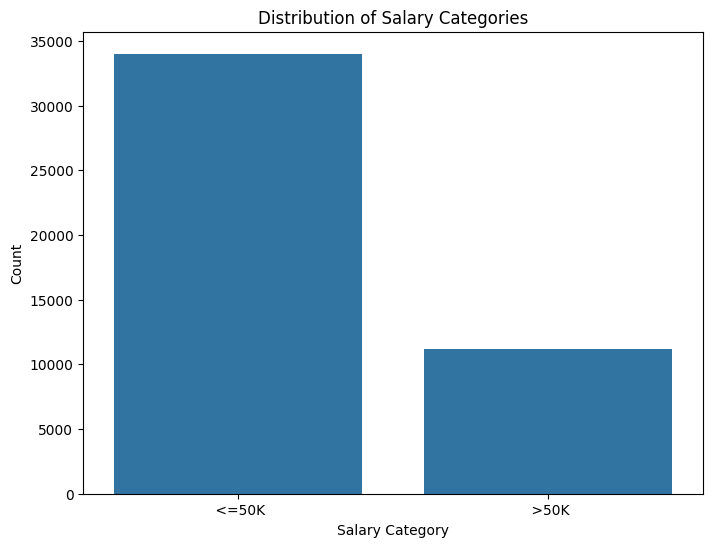

In [10]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Salary', data=data)
plt.xlabel('Salary Category')
plt.ylabel('Count')
plt.title('Distribution of Salary Categories')
plt.show()

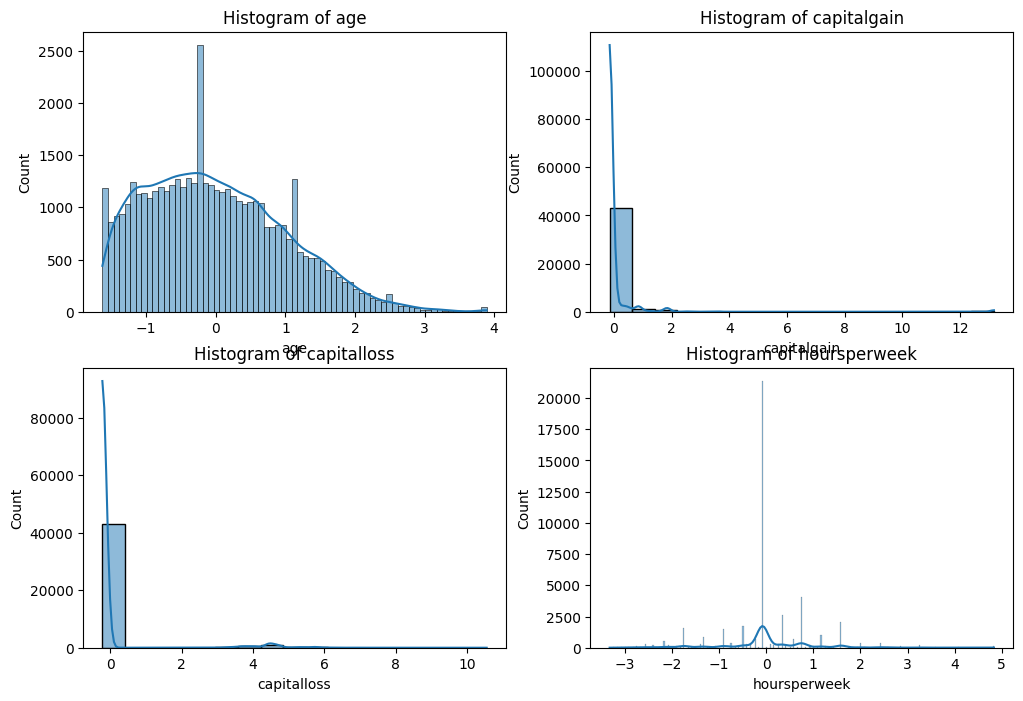

In [11]:
#Univariate analysis
plt.figure(figsize=(12, 8))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(2, 2, i)
    sns.histplot(data[col], kde=True)
    plt.title(f'Histogram of {col}')

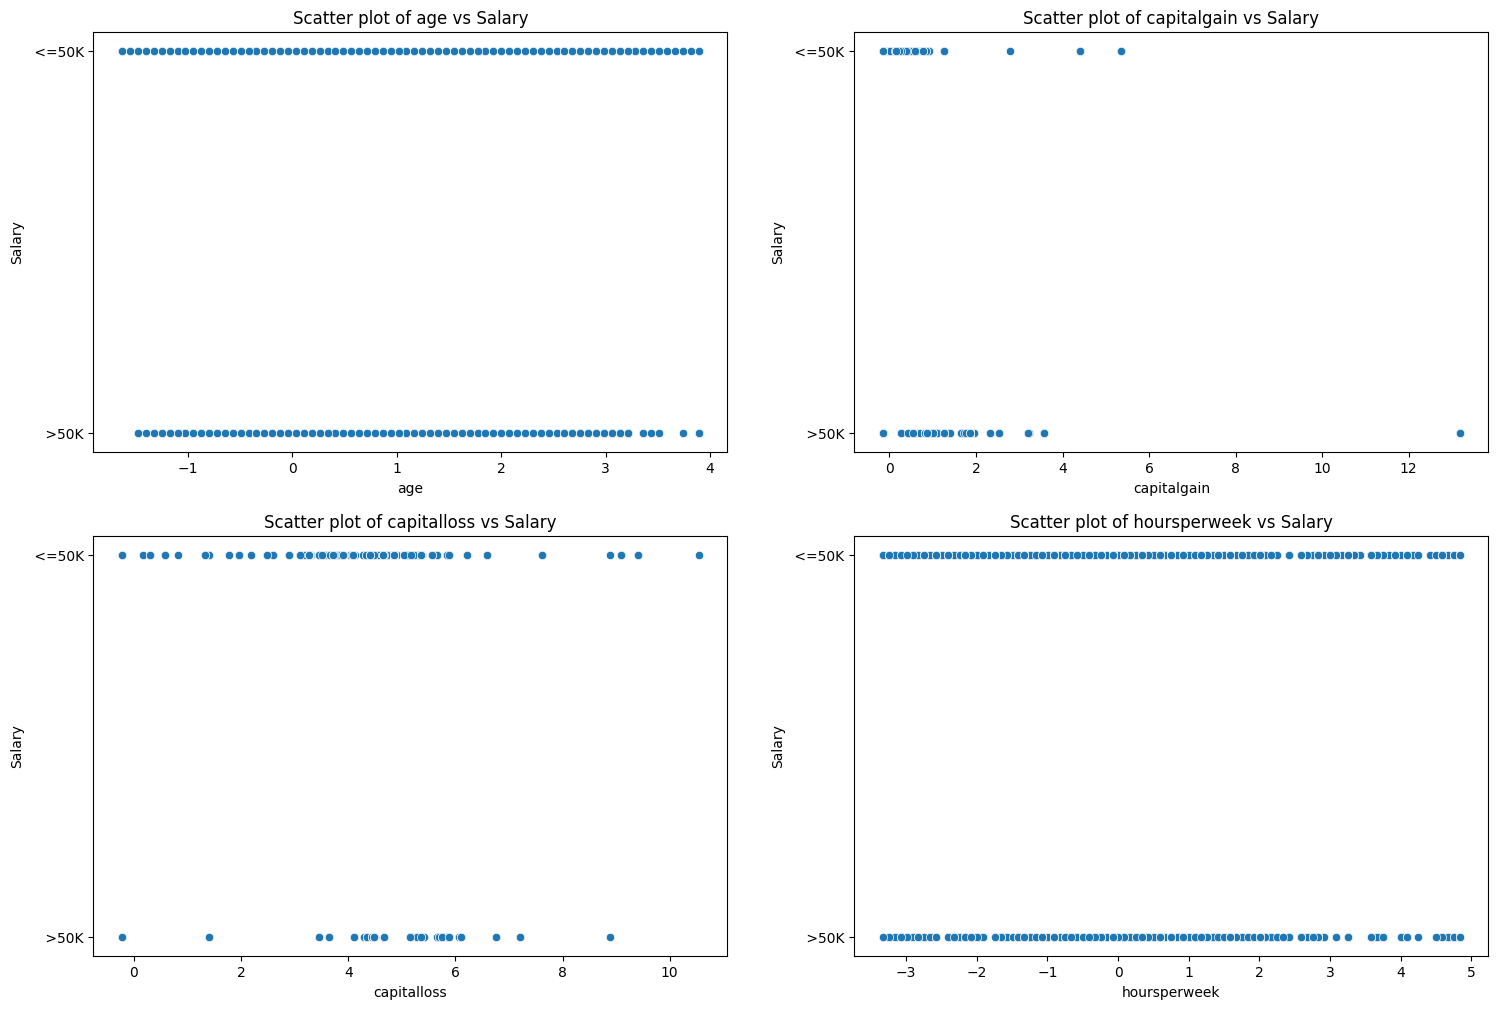

In [12]:
#Bivariate analysis
plt.figure(figsize=(18, 12))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(2, 2, i)
    sns.scatterplot(x=col, y='Salary', data=data)
    plt.title(f'Scatter plot of {col} vs Salary')

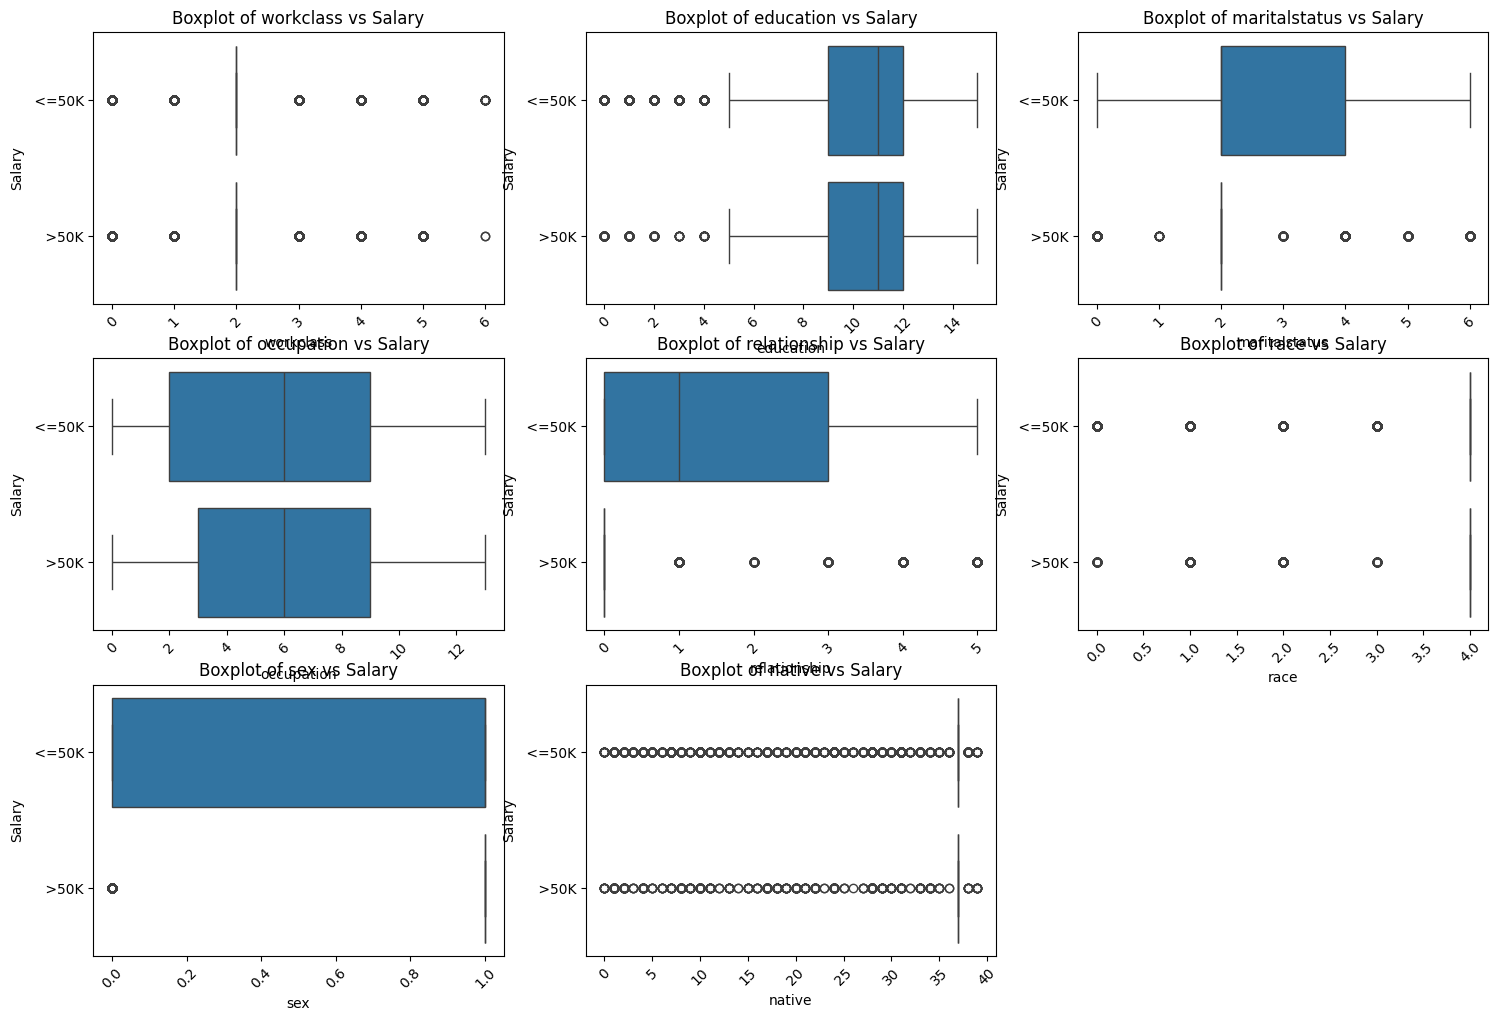

In [13]:
plt.figure(figsize=(18, 12))
for i, col in enumerate(categorical_cols, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(x=col, y='Salary', data=data)
    plt.title(f'Boxplot of {col} vs Salary')
    plt.xticks(rotation=45)

Text(0.5, 1.02, 'Pairplot of Numerical Features')

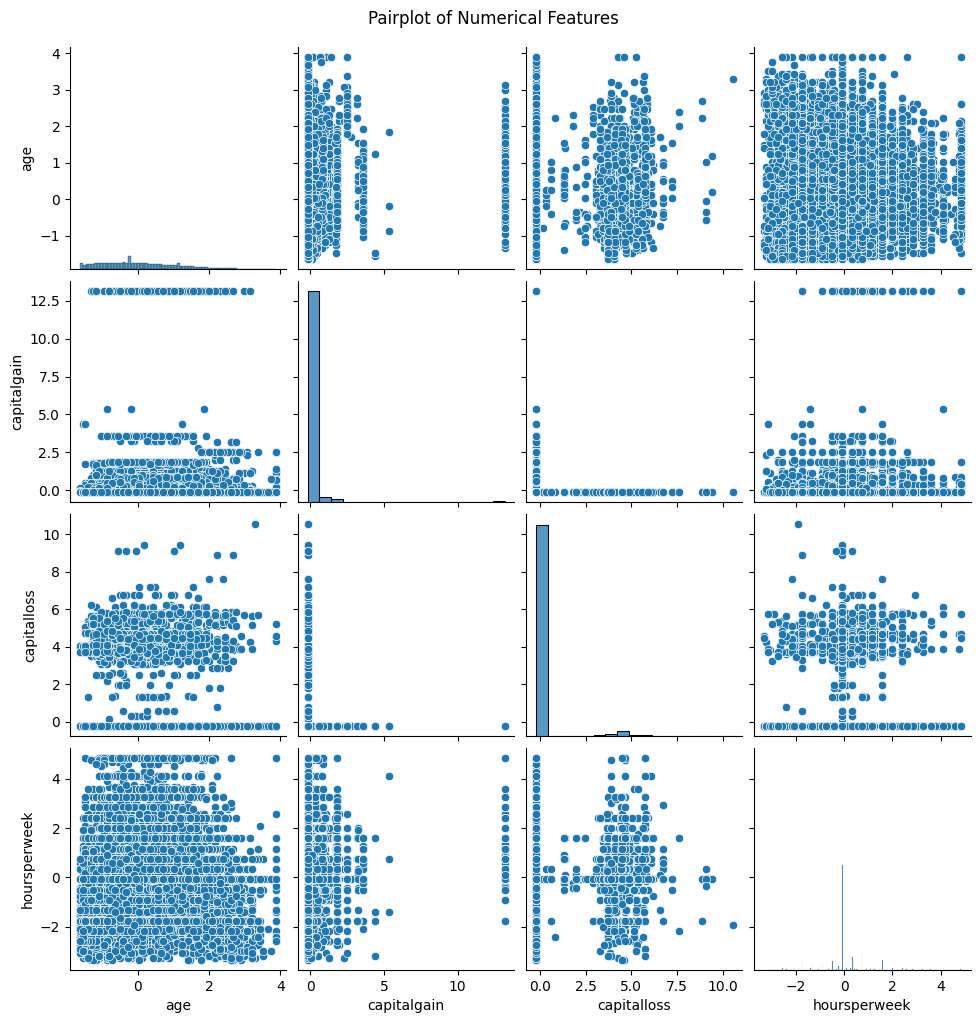

In [14]:
#Multivariate analysis
sns.pairplot(data[numerical_cols])
plt.suptitle('Pairplot of Numerical Features', y=1.02)

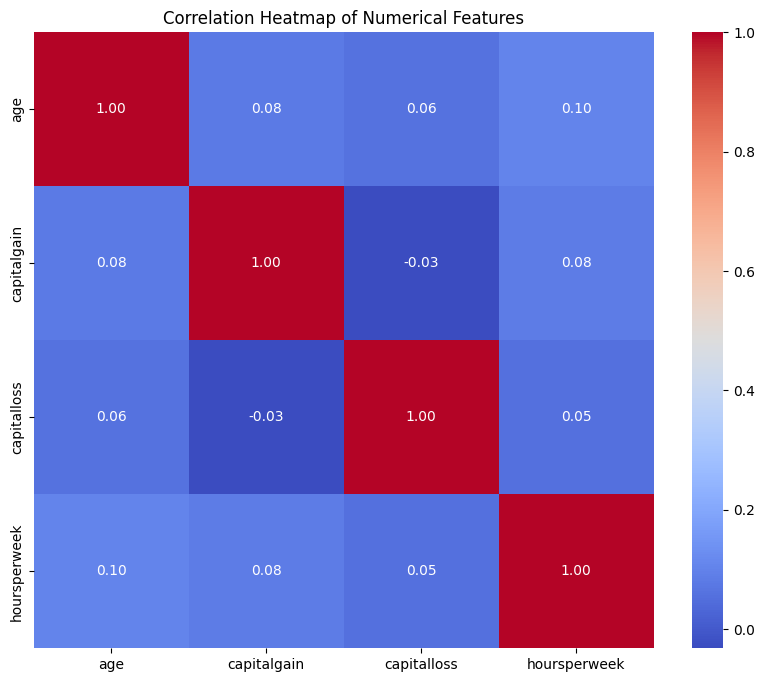

In [15]:
plt.figure(figsize=(10, 8))
sns.heatmap(data[numerical_cols].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

Insights
Accuracy- The model is about 80.9% accurate in predicting salary levels.

By looking at features like age, education, occupation, and work class, the model predicts salary levels. This information can help organizations understand what factors influence salaries and make better decisions regarding employee compensation.

count of less than 50k is more than comapred to count of greater than 50 k salary

The histogram shows that there are more people in the younger age groups, with the number of people decreasing as age increases. The histogram also shows that there is a small number of people in the very oldest age groups.

The distribution of the capitalgain is rightskewed.

This suggests that a small number of people made a lot of money from capital gains, while most people made little or no money.

There is a negative correlation in between relationship of salary and age, as the salary increases the salary decreases.


Private jobs pay the most, government jobs the least, with self-employed offering the biggest salary rollercoaster across different work classes.

Hours worked per week has a weak positive correlation with capital gains, and a weak negative correlation with capital loss. This suggests that people who work more hours tend to have slightly higher capital gains and slightly lower capital losses than people who work fewer hours.

Age has a very weak positive correlation with capital gains, and a very weak negative correlation with capital loss. This suggests that there is almost no relationship between age and capital gains or losses.

Capital loss and capital gain are negatively correlated. This means that people who experience high capital losses tend to experience lower capital gains

# classify the Size_Categorie using SVM

In [16]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [17]:
df= pd.read_csv("/content/forestfires.csv")
df.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small


In [18]:
df.columns

Index(['month', 'day', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind',
       'rain', 'area', 'dayfri', 'daymon', 'daysat', 'daysun', 'daythu',
       'daytue', 'daywed', 'monthapr', 'monthaug', 'monthdec', 'monthfeb',
       'monthjan', 'monthjul', 'monthjun', 'monthmar', 'monthmay', 'monthnov',
       'monthoct', 'monthsep', 'size_category'],
      dtype='object')

In [19]:
#Encoding categorical variables
label_encoder = LabelEncoder()
df['month'] = label_encoder.fit_transform(df['month'])
df['day'] = label_encoder.fit_transform(df['day'])

In [20]:
#Spliting into features and target variable
X = df.drop(columns=['size_category'])
y = df['size_category']

In [21]:
#Scaling numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [22]:
#Spliting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [23]:
#Training the SVM model and making predictions
svm_model = SVC(kernel='linear')
svm_model.fit(X_train, y_train)
y_pred = svm_model.predict(X_test)

In [24]:
#Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9038461538461539
Classification Report:
               precision    recall  f1-score   support

       large       0.95      0.68      0.79        28
       small       0.89      0.99      0.94        76

    accuracy                           0.90       104
   macro avg       0.92      0.83      0.86       104
weighted avg       0.91      0.90      0.90       104



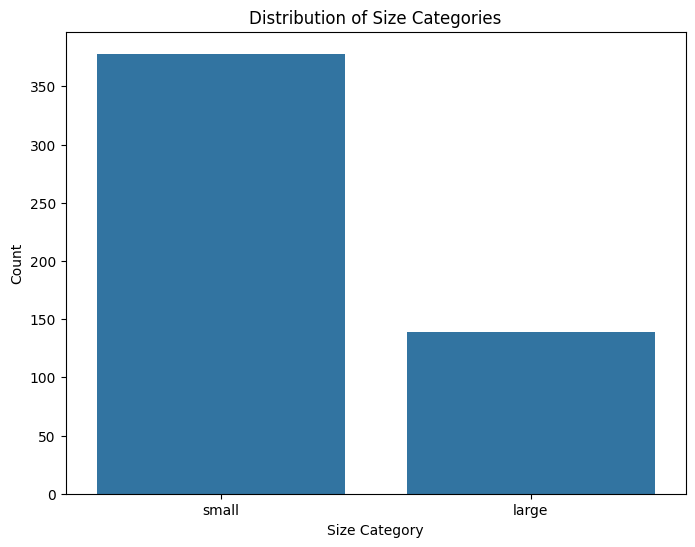

In [25]:
plt.figure(figsize=(8, 6))
sns.countplot(x='size_category', data=df)
plt.xlabel('Size Category')
plt.ylabel('Count')
plt.title('Distribution of Size Categories')
plt.show()

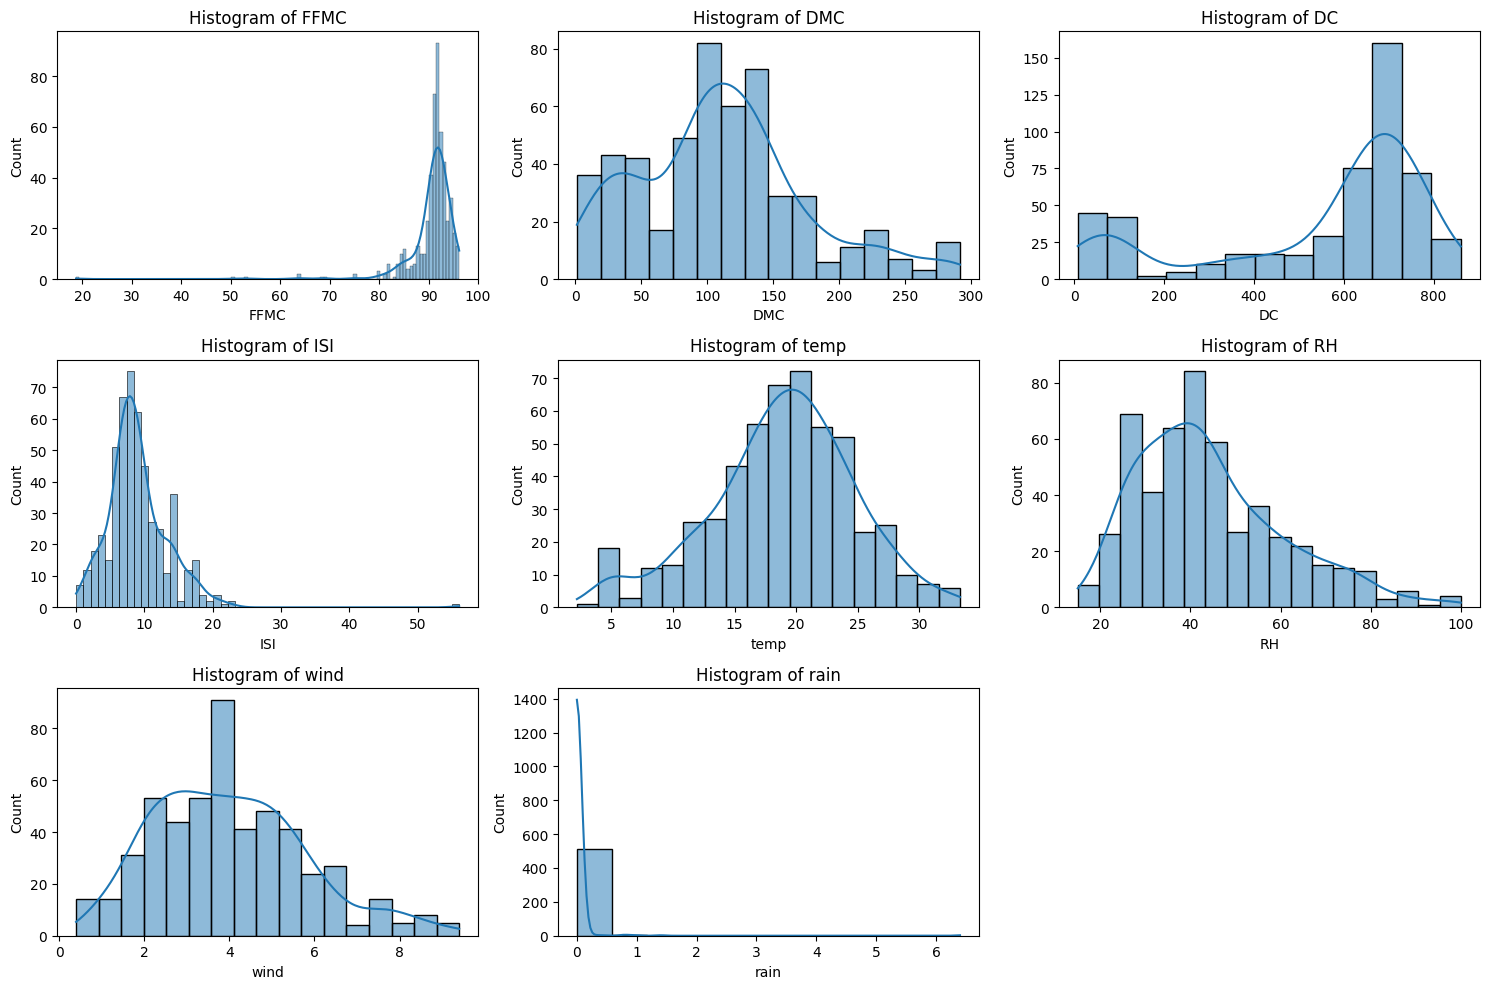

In [26]:
#Univariate Analysis
plt.figure(figsize=(15, 10))
for i, col in enumerate(['FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind', 'rain'], 1):
    plt.subplot(3, 3, i)
    sns.histplot(df[col], kde=True)
    plt.title(f'Histogram of {col}')
plt.tight_layout()
plt.show()

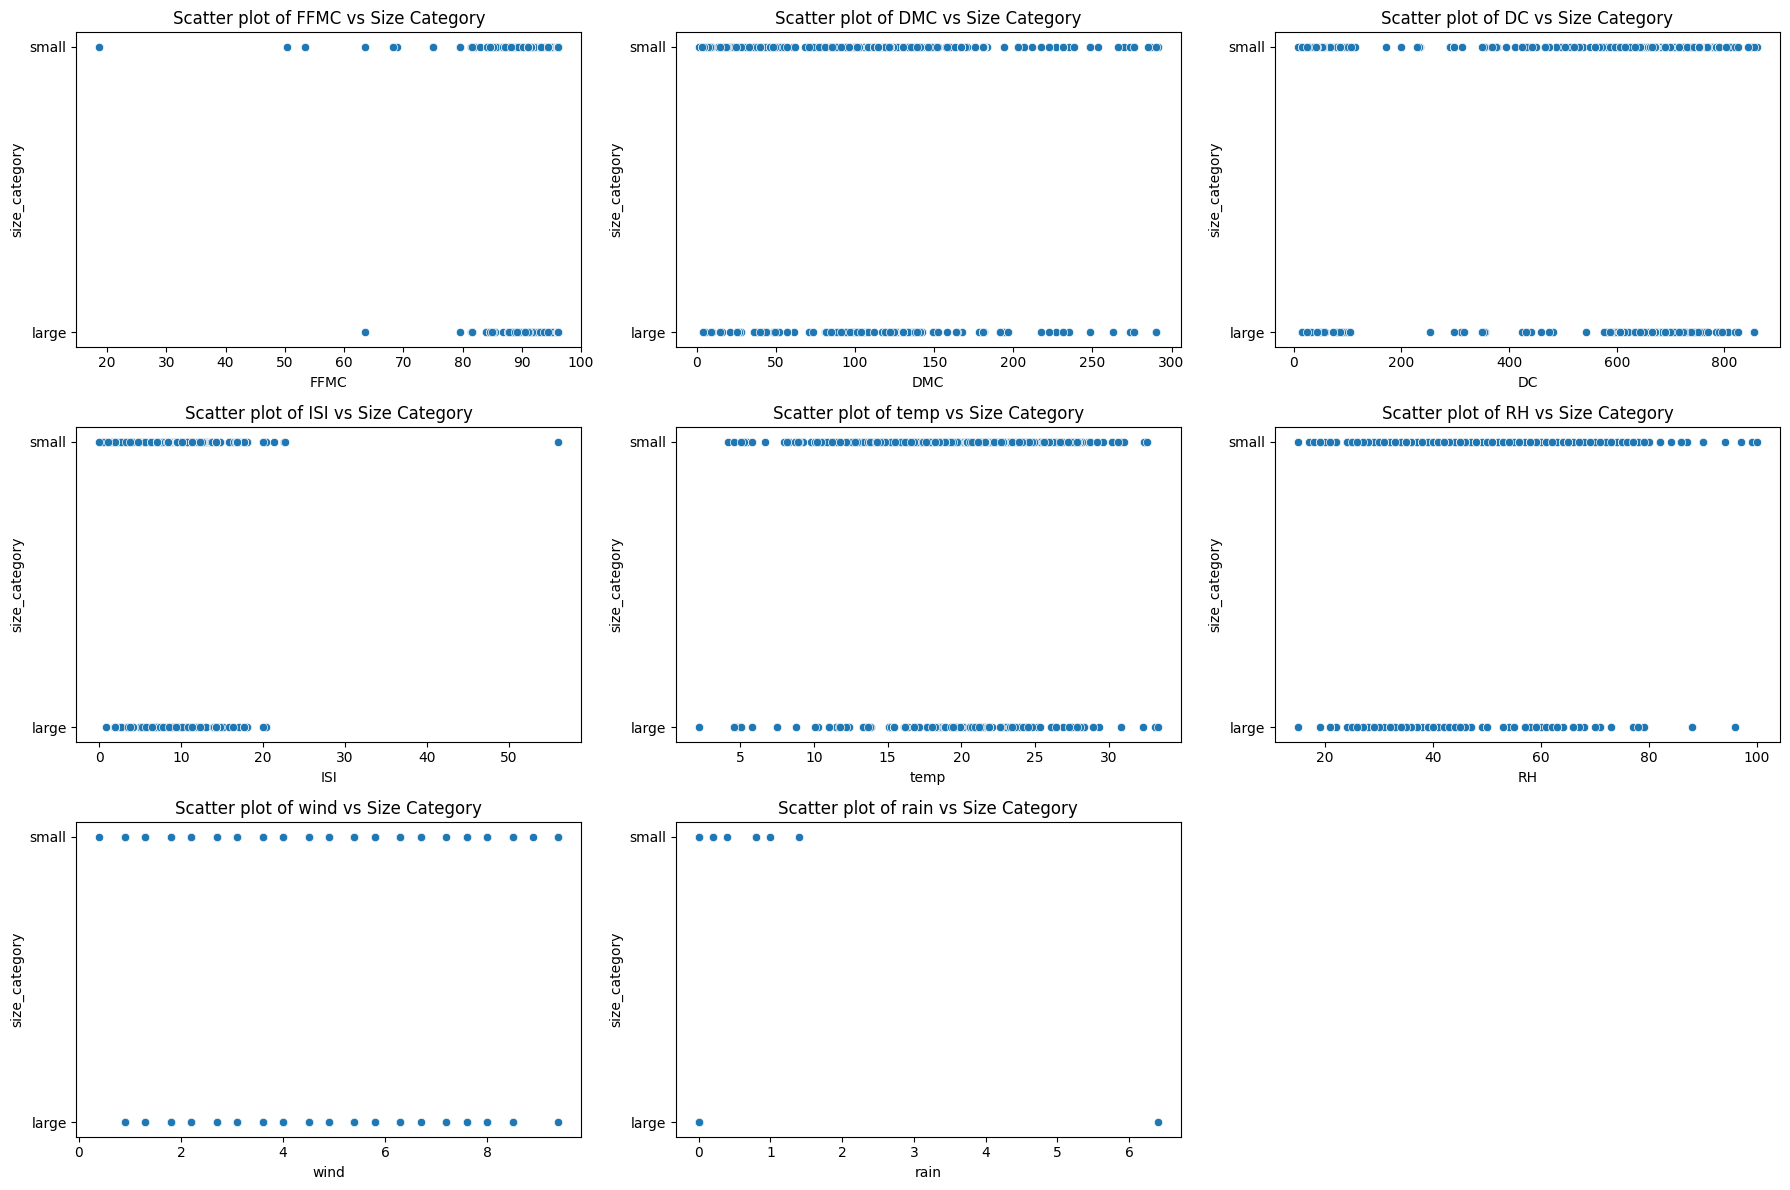

In [27]:
#Bivariate Analysis
plt.figure(figsize=(18, 12))
for i, col in enumerate(['FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind', 'rain'], 1):
    plt.subplot(3, 3, i)
    sns.scatterplot(x=col, y='size_category', data=df)
    plt.title(f'Scatter plot of {col} vs Size Category')
plt.tight_layout()
plt.show()

<ipython-input-28-57b59cd7e534>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df[['FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind', 'rain', 'size_category']].corr(), annot=True, cmap='coolwarm')


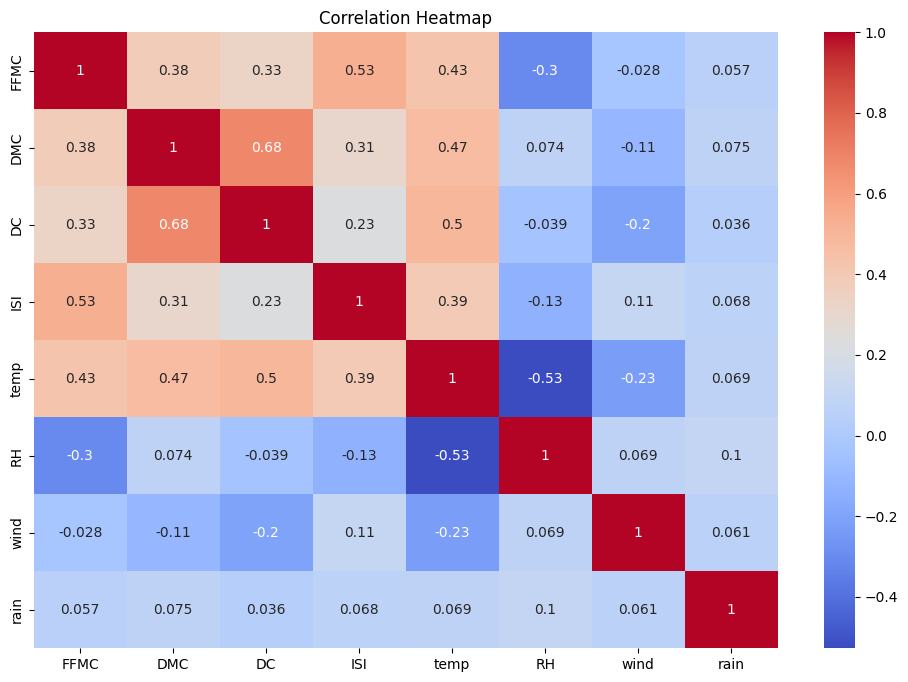

In [28]:
#Multivariate Analysis
plt.figure(figsize=(12, 8))
sns.heatmap(df[['FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind', 'rain', 'size_category']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

Insights

Accuracy- The model is about 90.4% accurate, which means it correctly predicts whether a fire is large or small most of the time.

Precision and Recall- When the model says a fire is large, it's right about 95% of the time. For small fires, it identifies them correctly about 99% of the time.

Small category ahve high count compared to large category.

FFMC and DMC are mostly low, suggesting low fire danger.  

This model helps categorize forest fires based on their size using factors like temperature, humidity, wind speed, and rain. It's valuable for forest management to respond effectively to fires.

DC is slightly higher, but still within moderate range.

ISI is also low, indicating low potential for rapid fire spread.

Temp and RH are inversely correlated, with higher temperatures corresponding to lower humidity.

Wind speeds are generally stronger than rain amounts.
Both wind and rain distributions are skewed to the right, indicating more frequent lower values and less frequent higher values.

There is a small overlap between the wind and rain distributions, suggesting some instances where both wind and rain occur simultaneously.